# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [83]:
#Import all the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [84]:
pima_df=pd.read_csv("diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [85]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [86]:
print(pima_df.dtypes)
print(pima_df.shape)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

# Answer: Not Considering Columns, Age (As age cannot be zero), Preganancy(As pregnancy can be zero) and Outcome(As that is the dependent variable)

In [87]:
pima_df_old=pd.read_csv("diabetes.csv")
print(pima_df_old.median())
print(pima_df.median())

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64
Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64


In [88]:
x1=pima_df['Glucose'].median()
x2=pima_df['BloodPressure'].median()
x3=pima_df['SkinThickness'].median()
x4=pima_df['Insulin'].median()
x5=pima_df['BMI'].median()
x6=pima_df['DiabetesPedigreeFunction'].median()

In [90]:
pima_df['Glucose'].replace(to_replace=0, value=x1, inplace=True)
pima_df['BloodPressure'].replace(to_replace=0, value=x1, inplace=True)
pima_df['SkinThickness'].replace(to_replace=0, value=x1, inplace=True)
pima_df['Insulin'].replace(to_replace=0, value=x1, inplace=True)
pima_df['BMI'].replace(to_replace=0, value=x1, inplace=True)
pima_df['DiabetesPedigreeFunction'].replace(to_replace=0, value=x1, inplace=True)

In [91]:

pima_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,117,33.6,0.627,50,1
1,1,85,66,29,117,26.6,0.351,31,0
2,8,183,64,117,117,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,117,117,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,117,117,117,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,117,117,117.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [92]:
pima_df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,74.437500,15.262202,24.000,64.00000,73.0000,82.00000,122.00
SkinThickness,768.0,55.118490,41.062553,7.000,25.00000,35.0000,117.00000,117.00
Insulin,768.0,136.776042,87.179770,14.000,117.00000,117.0000,127.25000,846.00
BMI,768.0,33.668359,12.178062,18.200,27.50000,32.4000,36.82500,117.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Outcome' variable and plot it using appropriate graph.

# Answer: Using count plot to check the distribution of Zeros and Ones

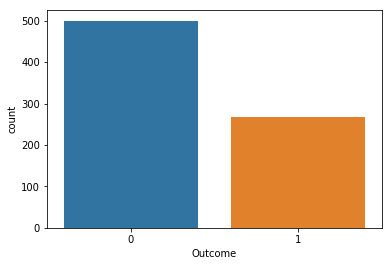

In [94]:
# Count Plot (a.k.a. Bar Plot)
import seaborn as sns
sns.countplot(x='Outcome', data=pima_df)
#plt.xticks(rotation=-45)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

In [95]:
pima_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.156702,0.166908,0.017009,0.014067,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.156481,0.078601,0.417081,0.073473,0.137327,0.266909,0.492782
BloodPressure,0.156702,0.156481,1.000000,0.309770,-0.000244,0.311108,-0.035771,0.228618,0.161868
SkinThickness,0.166908,0.078601,0.309770,1.000000,-0.110868,0.120053,-0.128558,0.243280,0.097476
Insulin,0.017009,0.417081,-0.000244,-0.110868,1.000000,0.077668,0.132982,0.086489,0.200049
BMI,0.014067,0.073473,0.311108,0.120053,0.077668,1.000000,0.075002,-0.009182,0.141208
DiabetesPedigreeFunction,-0.033523,0.137327,-0.035771,-0.128558,0.132982,0.075002,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.228618,0.243280,0.086489,-0.009182,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.161868,0.097476,0.200049,0.141208,0.173844,0.238356,1.000000


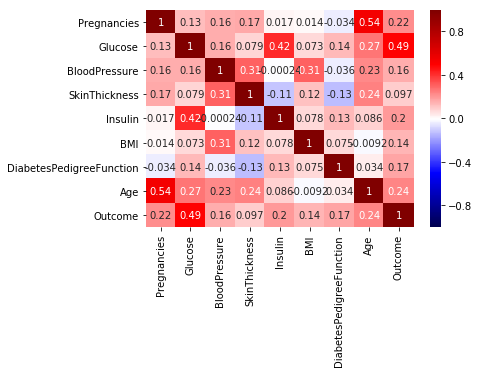

In [96]:
sns.heatmap(pima_df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

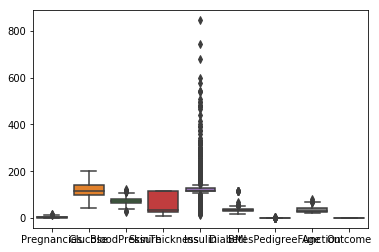

In [97]:
sns.boxplot(data=pima_df)

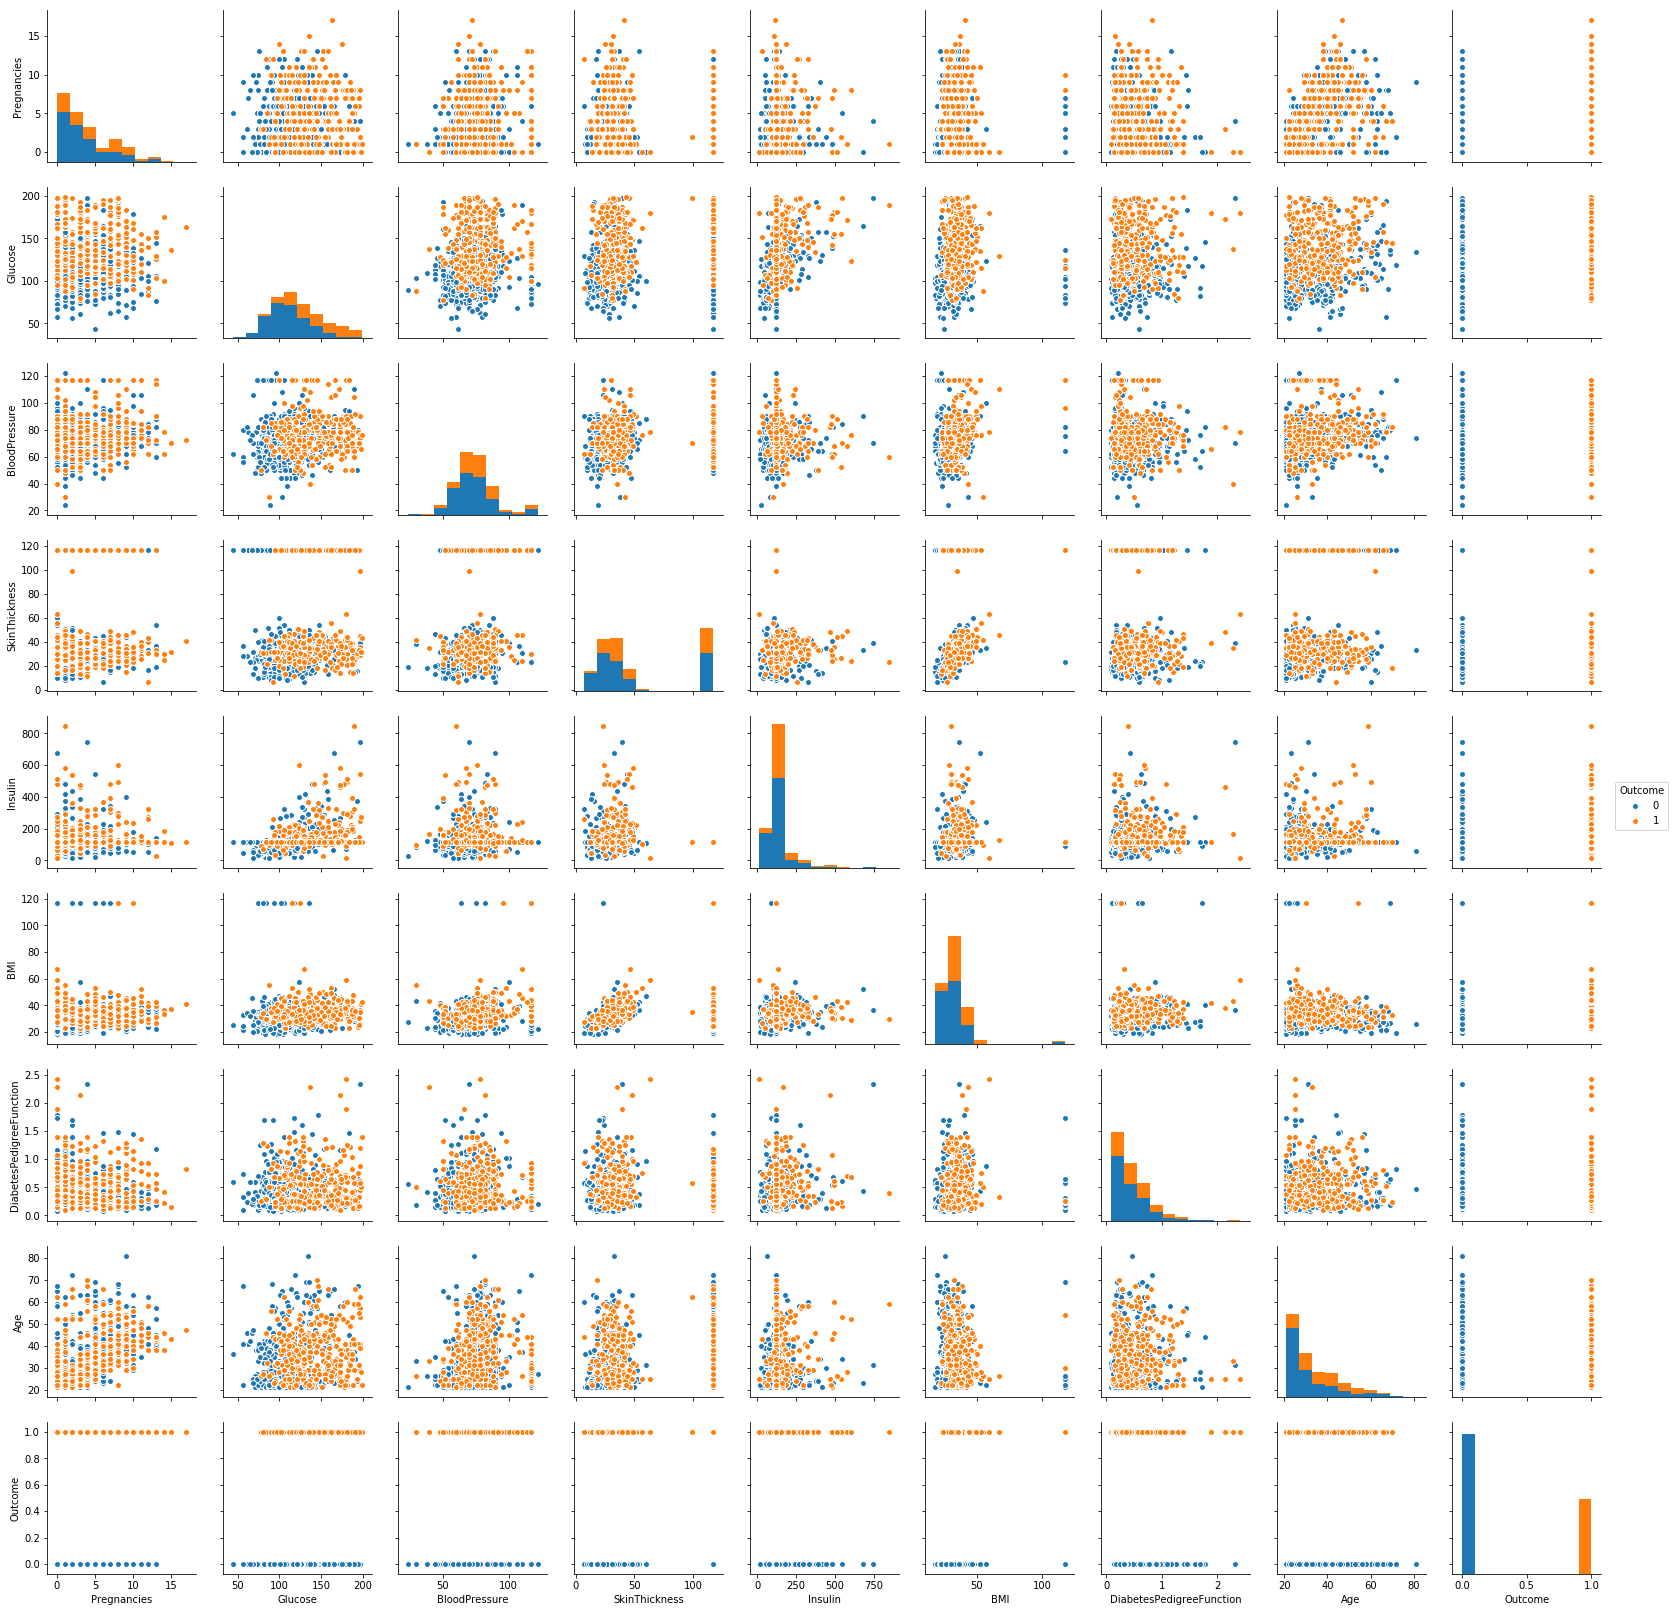

In [98]:
sns.pairplot(pima_df, hue='Outcome')

# Ans 7 Conclusion 

Glucose has a high correlation with Diabetes (Glucose Increase with Diabetes)

Pregnancies has a high correlation with Age (Pregnancies Increase with Age)

Skin Thickness has a negative correlation with insulin (As skin thickness increases the insulin will reduce)

Glucose has a high correlation with Insulin (Glucose Increase leads to higher use of insulin )

Skin Thickness has a negative correlation with DiabetesPedgree Function

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [106]:
pima_df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,117,33.6,0.627,50,1


In [189]:
array = pima_df.values
X = array[:,0:8] # select all rows and first 7 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties


In [190]:

test_size = 0.30 # taking 70:30 training and test set
seed = 42  # Random numbmer seeding for reapeatability of the code
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [191]:
X_train = pima_df.head(538)
X_test = pima_df.tail(230)

y_train = X_train.pop("Outcome")
y_test = X_test.pop("Outcome")

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [192]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_leaf_nodes=30)
dt_model.fit(X_train, y_train)


#print(metrics.confusion_matrix(test_labels, y_predict_phn))
#print(metrics.recall_score(test_labels, y_predict_phn))
#print(metrics.precision_score(test_labels, y_predict_phn))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=30,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [193]:
y_predict = dt_model.predict(X_test)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [194]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(dt_model.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7652173913043478
[[137  14]
 [ 40  39]]


Print the feature importance of the decision model - Optional

In [186]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                               Imp
Pregnancies               0.038690
Glucose                   0.343169
BloodPressure             0.056759
SkinThickness             0.031530
Insulin                   0.072110
BMI                       0.213805
DiabetesPedigreeFunction  0.095819
Age                       0.148117


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [195]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)


In [200]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7956521739130434
[[135  16]
 [ 31  48]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [205]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, y_train)


In [206]:
y_predict = abcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7956521739130434
[[126  25]
 [ 32  47]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [211]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)


In [212]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7956521739130434
[[132  19]
 [ 28  51]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [214]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

In [215]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8043478260869565
[[135  16]
 [ 29  50]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.